# Лаба 5: Chicago_hotels

##### Вариант 1: АЗИЗИ БАХРАМ

### Let's Import all necessary libraries

In [199]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from scipy import stats
import seaborn as sns

In [200]:
import os

# This is my file path for the lab works
os.chdir("C:/Users/bahra/Desktop/Lect_01/Lect_10/Задачи для лабораторной 5/Задачи для лабораторной 5")

#### Вариант 1: 
* Коэффициент загрузки гостиниц в процентах (Hotel Occupancy (in %))
* Данные для Chicago Central Business District Hotel Statistics. 
* Предоставлены средние значения процента занятых номеров за один день. 
* Усреднение по отелям и по дням месяца.
* Данные расположены в столбце x1 файла Chicago_hotels.csv

In [201]:
# Let's read the data
df = pd.read_csv("Chicago_hotels.csv", sep = ';')
# Let's see what we have
df.head()

,date1,date2,x1,x2,x3,x4
0,January,1994,"44,3","104,04","51,9","72,15"
1,February,1994,"54,7","102,74","60,1","73,47"
2,March,1994,"61,9","105,23",65,"74,91"
3,April,1994,"69,1","113,63","69,8","79,06"
4,May,1994,"70,8","120,77","72,4","82,07"


* In our version, we only need to work with the 'x1', so we will only look at that.

In [202]:
df = df[['date1','date2','x1']]
df.columns = ['month', 'year', 'data_x1']

In [203]:
df.head()

,month,year,data_x1
0,January,1994,"44,3"
1,February,1994,"54,7"
2,March,1994,"61,9"
3,April,1994,"69,1"
4,May,1994,"70,8"


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    120 non-null    object
 1   year     120 non-null    int64 
 2   data_x1  120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


* For now we have a non empty rows and columns, that is good.

##### Let's check clean and standardize our data
* The target values are stored in strings, so it will be necessary to transform them into an adequate format

In [205]:
def to_float (x):
    if x==' ' or x == '':
        return 0
    else:
        parts = x.split(',')
        if len(parts)>1:
            return float(parts[0]+'.'+parts[1])
        else:
            return float(parts[0])

In [206]:
df.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

* Let's build a function for month conversion, adding the month and time of the year, because there are so few parameters

In [207]:
def month_to_number(x):
    if x == 'January':
        return 1
    if x == 'February':
        return 2
    if x == 'March':
        return 3
    if x == 'April':
        return 4
    if x == 'May':
        return 5
    if x == 'June':
        return 6
    if x == 'July':
        return 7
    if x == 'August':
        return 8
    if x == 'September':
        return 9
    if x == 'October':
        return 10
    if x == 'November':
        return 11
    if x == 'December':
        return 12

* Let's build a function for seasons as well

In [208]:
def month_to_season(x):
    if x in [11,12,1]:
        return 1
    if x in [2,3,4]:
        return 2
    if x in [5,6,7]:
        return 3
    if x in [8,9,10]:
        return 4

* Now let's use our fanctions

In [209]:
# Converting months to numeric values
df.month = df.month.apply(month_to_number)

In [210]:
# New column for seasons
df['season']=df.month.apply(month_to_season)

In [211]:
# let's change the data type into float for better representation
df.data_x1 = df.data_x1.apply(to_float)

In [212]:
# Let's add the index column
df['ind_date'] = df.index.values

In [213]:
df.year

0      1994
1      1994
2      1994
3      1994
4      1994
       ... 
115    2003
116    2003
117    2003
118    2003
119    2003
Name: year, Length: 120, dtype: int64

In [214]:
# Let's change the date to numeric value by subtracting 1993
# We will get 1 through 10 (10 years)
df.year= df.year - 1993

In [215]:
df.year

0       1
1       1
2       1
3       1
4       1
       ..
115    10
116    10
117    10
118    10
119    10
Name: year, Length: 120, dtype: int64

In [216]:
df.head()

,month,year,data_x1,season,ind_date
0,1,1,44.3,1,0
1,2,1,54.7,2,1
2,3,1,61.9,2,2
3,4,1,69.1,2,3
4,5,1,70.8,3,4


* That is more readable.

###### Now let's add data for every month for seasonal analysis

In [217]:
df["m01"] = [1,0,0,0,0,0,0,0,0,0,0,0]*10
df["m02"] = [0,1,0,0,0,0,0,0,0,0,0,0]*10
df["m03"] = [0,0,1,0,0,0,0,0,0,0,0,0]*10
df["m04"] = [0,0,0,1,0,0,0,0,0,0,0,0]*10
df["m05"] = [0,0,0,0,1,0,0,0,0,0,0,0]*10
df["m06"] = [0,0,0,0,0,1,0,0,0,0,0,0]*10
df["m07"] = [0,0,0,0,0,0,1,0,0,0,0,0]*10
df["m08"] = [0,0,0,0,0,0,0,1,0,0,0,0]*10
df["m09"] = [0,0,0,0,0,0,0,0,1,0,0,0]*10
df["m10"] = [0,0,0,0,0,0,0,0,0,1,0,0]*10
df["m11"] = [0,0,0,0,0,0,0,0,0,0,1,0]*10
df["m12"] = [0,0,0,0,0,0,0,0,0,0,0,1]*10

In [218]:
df.head(8)

,month,year,data_x1,season,ind_date,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,1,1,44.3,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,1,54.7,2,1,0,1,0,0,0,0,0,0,0,0,0,0
2,3,1,61.9,2,2,0,0,1,0,0,0,0,0,0,0,0,0
3,4,1,69.1,2,3,0,0,0,1,0,0,0,0,0,0,0,0
4,5,1,70.8,3,4,0,0,0,0,1,0,0,0,0,0,0,0
5,6,1,76.9,3,5,0,0,0,0,0,1,0,0,0,0,0,0
6,7,1,77.5,3,6,0,0,0,0,0,0,1,0,0,0,0,0
7,8,1,75.0,4,7,0,0,0,0,0,0,0,1,0,0,0,0


In [219]:
train = df[df.data_x1 > 0 ]
test = df[df.data_x1 == 0 ]

<AxesSubplot:>

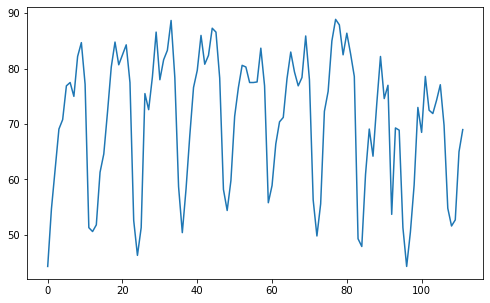

In [220]:
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(121)
train['data_x1'].plot(ax=ax1)

* We got a nice seasonal chart
* According to the graph, there is a visible seasonality and, apparently, a polynomial trend, most likely a quadratic one, but first we will try to build a purely linear model



### Let's divide the data into train and test sample

In [221]:
# Data for X
X_test =  test.drop('data_x1', axis=1)
X_train = train.drop('data_x1', axis=1)

# Data for y
y_test =  test['data_x1']
y_train = train['data_x1']

### Training our linear regression model

In [222]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [223]:
X_train

,month,year,season,ind_date,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0
2,3,1,2,2,0,0,1,0,0,0,0,0,0,0,0,0
3,4,1,2,3,0,0,0,1,0,0,0,0,0,0,0,0
4,5,1,3,4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,12,9,1,107,0,0,0,0,0,0,0,0,0,0,0,1
108,1,10,1,108,1,0,0,0,0,0,0,0,0,0,0,0
109,2,10,2,109,0,1,0,0,0,0,0,0,0,0,0,0
110,3,10,2,110,0,0,1,0,0,0,0,0,0,0,0,0


### Assessment models

In [224]:
coef = pd.DataFrame(list(zip(['intercept'] + X_train.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,50.944792
1,month,0.892169
2,year,-0.076282
3,season,6.388048
4,ind_date,-0.023216
5,m01,-6.701783
6,m02,-7.608784
7,m03,2.702263
8,m04,5.733310
9,m05,3.363315


* Let's define our regression coefficient model function.

In [225]:
def regression_coef(model, X, y):
    coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(np.abs(var_b))
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef

In [226]:
X_train.columns

Index(['month', 'year', 'season', 'ind_date', 'm01', 'm02', 'm03', 'm04',
       'm05', 'm06', 'm07', 'm08', 'm09', 'm10', 'm11', 'm12'],
      dtype='object')

In [227]:
regression_coef(model, X_train, y_train)

,predictor,coef,pvalue
0,intercept,50.944792,0.999999
1,month,0.892169,1.000000
2,year,-0.076282,1.000000
3,season,6.388048,1.000000
4,ind_date,-0.023216,1.000000
5,m01,-6.701783,1.000000
6,m02,-7.608784,1.000000
7,m03,2.702263,1.000000
8,m04,5.733310,1.000000
9,m05,3.363315,1.000000


In [228]:
print('R^2: {0}'.format(model.score(X_train, y_train)))

R^2: 0.8361731186813546


* We got a good metric for the training data, now let's evaluate the predictions visually

<AxesSubplot:>

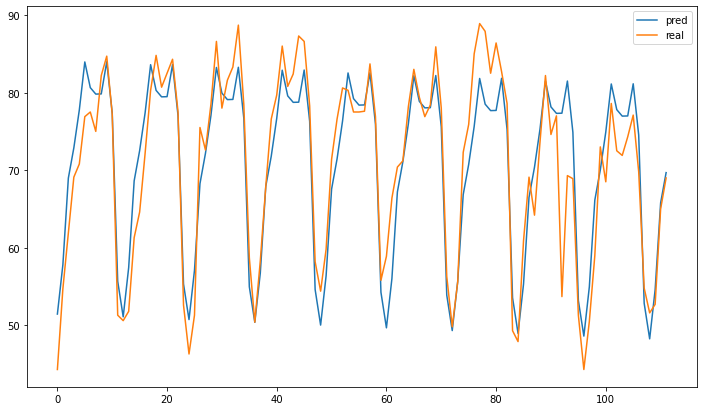

In [229]:
pred = pd.DataFrame({
    'pred': model.predict(X_train),
    'real': y_train})
pred.plot(figsize=(12, 7))

* The model did a pretty good job of predicting our training data.

In [230]:
pred_2 = pd.DataFrame(model.predict(X_test), columns=['forecast'])
pred_2['real'] = np.nan
pred_2['pred'] = np.nan

<AxesSubplot:>

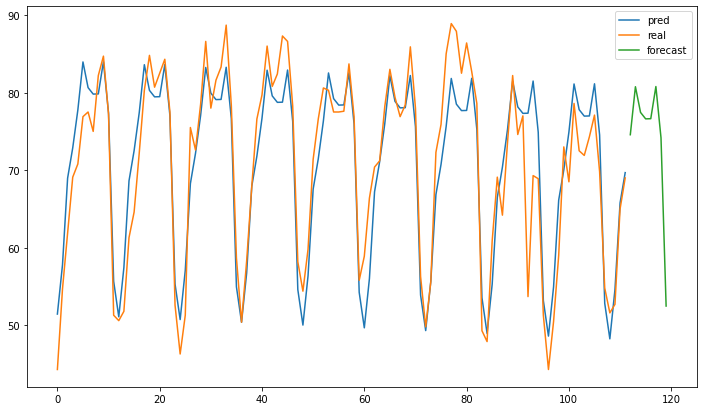

In [232]:
pred_3 = pd.concat(
    [pred, pred_2],
    sort=False
).reset_index(drop=True)

pred_3.plot(figsize=(12, 7))

### Conclusion
* We see that the model has learned to catch the trend and the model’s prediction for the future is very similar to the truth